<a href="https://colab.research.google.com/github/manikcb/all-my-assignments/blob/main/Adaboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [61]:
df= pd.read_csv(r'/content/keratodataset.csv')
df.head()

,Edad,K,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,...,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,Status
0,24,H,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,...,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,M
1,24,H,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,...,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,M
2,20,H,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,...,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,H
3,20,H,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,...,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,M
4,23,M,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,...,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,M


In [62]:
df=pd.get_dummies(df, columns=['K','Status'])
c1 = df.pop('Status_H')
c2 = df.pop('K_H')
c3 = df.pop('K_M')
c4 = df.pop('Status_M')
df.insert(13, 'Status_H', c1)
df.insert(14, 'K_H', c2)
df.insert(15, 'K_M', c3)
df.insert(16, 'Status_M', c4)
df.head(10)

,Edad,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,...,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF
0,24,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,...,-0.026,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253
1,24,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,...,0.039,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201
2,20,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,...,0.002,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085
3,20,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,...,0.015,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068
4,23,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,...,0.039,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131
5,23,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,0.18,-6.0,...,-0.018,0.270,-0.052,0.012,-0.042,0.068,-0.055,-0.040,0.013,0.105
6,68,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,0.08,-6.3,...,0.026,-0.099,0.053,-0.022,0.045,0.056,-0.050,-0.077,-0.080,0.242
7,68,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,0.05,-6.3,...,0.004,0.007,0.013,0.018,0.047,0.200,0.085,-0.054,-0.097,0.459
8,60,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,0.08,-6.1,...,0.024,-0.090,0.054,-0.040,0.045,0.056,-0.006,0.092,-0.018,0.249
9,60,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,0.04,-6.3,...,0.004,0.006,0.012,0.016,0.047,0.200,-0.097,-0.074,-0.091,0.440


In [63]:
y = df['Status_H']
X=df.drop(columns=['Status_H','K_M','K_H','Status_M'])


In [64]:
df.head()

,Edad,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,...,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF
0,24,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,...,-0.026,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253
1,24,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,...,0.039,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201
2,20,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,...,0.002,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085
3,20,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,...,0.015,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068
4,23,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,...,0.039,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8780487804878049


In [68]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1]


In [69]:
percentage = model.score(X_test, y_test)

In [70]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[55  2]
 [13 53]]
Test Set: 123
Accuracy = 87.8048780487805 %


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        57
           1       0.96      0.80      0.88        66

    accuracy                           0.88       123
   macro avg       0.89      0.88      0.88       123
weighted avg       0.89      0.88      0.88       123



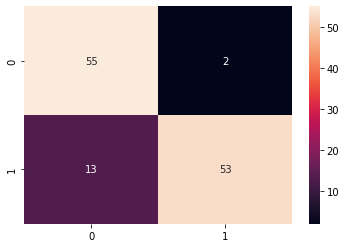

In [72]:
import seaborn as sns
sns.heatmap(res, annot=True)

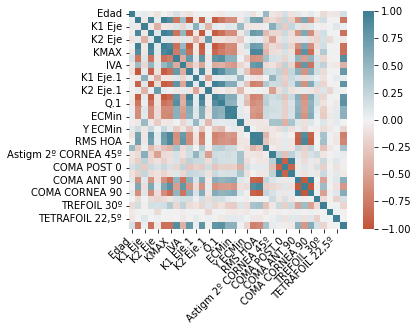

In [73]:
data = pd.read_csv('/content/keratodataset.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);